 - Understanding Problem statement & Business Requirement
 - Predict MSRP based on provided features
 - We will Use XGBoost, Decision Tree, Random Forest & Regression Model to predict the MSRP

In [3]:
import matplotlib.pyplot as plt # Data Visualisation
import plotly.express as px # Interactive Data Visualisation
from jupyterthemes import jtplot # Jupyternotebook theme
jtplot.style(theme = 'monokai', context = 'notebook',ticks = True, grid = 'False')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline Version of Plotly

In [4]:
# !pip install wordcloud

In [5]:
# !pip install xgboost

In [6]:
# Reading the CSV file
data = pd.read_csv(r'C:\Users\Administrator\Portfolio Projects\Datasets\cars_price.csv')

In [7]:
# Looking at the top 10 rows
data.head(10)
# Explaining the dataset

Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [8]:
# Looking at the last 5 rows of the dataset
data.tail()

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [9]:
# Looking at the 5 random rows
data.sample(5)

Make                        Model    Type  Origin DriveTrain  \
131     Ford  Crown Victoria LX Sport 4dr   Sedan     USA       Rear   
223    Lexus              IS 300 4dr auto   Sedan    Asia       Rear   
199   Jaguar                XKR coupe 2dr  Sports  Europe       Rear   
1      Acura               RSX Type S 2dr   Sedan    Asia      Front   
334  Porsche                  911 GT2 2dr  Sports  Europe       Rear   

         MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
131   $30,315   $27,756         4.6        8.0         239        17   
223   $32,415   $28,611         3.0        6.0         215        18   
199   $81,995   $74,676         4.2        8.0         390        16   
1     $23,820   $21,761         2.0        4.0         200        24   
334  $192,465  $173,560         3.6        6.0         477        17   

     MPG_Highway  Weight  Wheelbase  Length  
131           25    4057        115     212  
223           24    3285        105     177  
199           23    3865        102     187  
1             31    2778        101     172  
334           24    3131         93     175

In [10]:
# Looking at the features or the column names of our dataset
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [11]:
# Looking at the shape of teh dataset
data.shape

(428, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [13]:
# Looking for nulls in the dataset if any
data.isnull().sum()
# For cylinders we have 2 nulls that is missing data

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [14]:
data['Cylinders'].nunique()

7

In [15]:
data['Cylinders'].value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [16]:
data['Cylinders'].value_counts(normalize=True)

6.0     0.446009
4.0     0.319249
8.0     0.204225
5.0     0.016432
12.0    0.007042
10.0    0.004695
3.0     0.002347
Name: Cylinders, dtype: float64

In [17]:
data['Cylinders'].value_counts(dropna=False)

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
NaN       2
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [18]:
data_miss = data.values

In [19]:
data_miss

array([['Acura', 'MDX', 'SUV', ..., 4451, 106, 189],
       ['Acura', 'RSX Type S 2dr', 'Sedan', ..., 2778, 101, 172],
       ['Acura', 'TSX 4dr', 'Sedan', ..., 3230, 105, 183],
       ...,
       ['Volvo', 'S80 T6 4dr', 'Sedan', ..., 3653, 110, 190],
       ['Volvo', 'V40', 'Wagon', ..., 2822, 101, 180],
       ['Volvo', 'XC70', 'Wagon', ..., 3823, 109, 186]], dtype=object)

In [20]:
data_miss.shape

(428, 15)

In [21]:
data_miss[:,8:9]

array([[6.0],
       [4.0],
       [4.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [4.0],
       [4.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [8.0],
       [8.0],
       [8.0],
       [8.0],
       [4.0],
       [4.0],
       [6.0],
       [6.0],
       [8.0],
       [6.0],
       [8.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [8.0],
       [8.0],
       [8.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [8.0],
       [8.0],
       [6.0],
       [8.0],
       [8.0],
       [8.0],
       [8.0],
       [8.0],
       [8.0],
       [8.0],
       [6.0],
       [6.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
      

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_miss[:,8:9])
data_miss[:,8:9] = imputer.transform(data_miss[:,8:9])

In [24]:
new_data = pd.DataFrame(data_miss,columns=data.columns)

In [25]:
new_data

Make                    Model   Type  Origin DriveTrain     MSRP  \
0    Acura                      MDX    SUV    Asia        All  $36,945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  $23,820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  $26,990   
3    Acura                   TL 4dr  Sedan    Asia      Front  $33,195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  $43,755   
..     ...                      ...    ...     ...        ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight  \
0    $33,337        3.5         6        265       17          23   4451   
1    $21,761          2         4        200       24          31   2778   
2    $24,647        2.4         4        200       22          29   3230   
3    $30,299        3.2         6        270       20          28   3575   
4    $39,014        3.5         6        225       18          24   3880   
..       ...        ...       ...        ...      ...         ...    ...   
423  $38,203        2.4         5        197       21          28   3450   
424  $40,083        2.3         5        242       20          26   3450   
425  $42,573        2.9         6        268       19          26   3653   
426  $24,641        1.9         4        170       22          29   2822   
427  $33,112        2.5         5        208       20          27   3823   

    Wheelbase Length  
0         106    189  
1         101    172  
2         105    183  
3         108    186  
4         115    197  
..        ...    ...  
423       105    186  
424       105    186  
425       110    190  
426       101    180  
427       109    186  

[428 rows x 15 columns]

In [26]:
new_data['Cylinders'].value_counts(dropna=False)

6.0     192
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [27]:
data['Cylinders'].fillna(data['Cylinders'].mode()[0], inplace=True)

In [28]:
data['Cylinders'].value_counts(dropna=False)

6.0     192
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [29]:
# Getting only the complete cases that is by removing rows that has null values
data = data.dropna()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.5+ KB


In [31]:
mystr = '$10,500'

In [32]:
mystr = '$10,00,20,200'

In [33]:
mystr = "$36,945"

In [34]:
# Need to remove $ & comma

In [35]:
mystr.replace('$','')

'36,945'

In [36]:
mystr.replace('$','').replace(',','')

'36945'

In [37]:
int(mystr.replace('$','').replace(',',''))

36945

In [38]:
data['MSRP'].str.replace('$','').str.replace(',','')

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 428, dtype: object

In [39]:
data['MSRP'] = data['MSRP'].str.replace('$','').str.replace(',','').astype(int)

In [40]:
data['Invoice'] = data['Invoice'].str.replace('$','').str.replace(',','').astype(int)

In [41]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 50.2+ KB


In [43]:
data['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [44]:
data.describe().T

count          mean           std      min        25%      50%  \
MSRP         428.0  32774.855140  19431.716674  10280.0  20334.250  27635.0   
Invoice      428.0  30014.700935  17642.117750   9875.0  18866.000  25294.5   
EngineSize   428.0      3.196729      1.108595      1.3      2.375      3.0   
Cylinders    428.0      5.808411      1.554844      3.0      4.000      6.0   
Horsepower   428.0    215.885514     71.836032     73.0    165.000    210.0   
MPG_City     428.0     20.060748      5.238218     10.0     17.000     19.0   
MPG_Highway  428.0     26.843458      5.741201     12.0     24.000     26.0   
Weight       428.0   3577.953271    758.983215   1850.0   3104.000   3474.5   
Wheelbase    428.0    108.154206      8.311813     89.0    103.000    107.0   
Length       428.0    186.362150     14.357991    143.0    178.000    187.0   

                  75%       max  
MSRP         39205.00  192465.0  
Invoice      35710.25  173560.0  
EngineSize       3.90       8.3  
Cylinders        6.00      12.0  
Horsepower     255.00     500.0  
MPG_City        21.25      60.0  
MPG_Highway     29.00      66.0  
Weight        3977.75    7190.0  
Wheelbase      112.00     144.0  
Length         194.00     238.0

In [45]:
data.MSRP.min(),data.MSRP.max()

(10280, 192465)

In [46]:
data['Make'].nunique()

38

In [47]:
data['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
                 ..
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: Make, Length: 38, dtype: int64

In [48]:
data['Make'].value_counts().rank(ascending=True)

Toyota           38.0
Chevrolet        37.0
Mercedes-Benz    36.0
Ford             35.0
BMW              34.0
                 ... 
Jeep              6.0
Isuzu             3.0
MINI              3.0
Scion             3.0
Hummer            1.0
Name: Make, Length: 38, dtype: float64

In [49]:
data['Make'].value_counts().rank(ascending=True).head(10)

Toyota           38.0
Chevrolet        37.0
Mercedes-Benz    36.0
Ford             35.0
BMW              34.0
Audi             33.0
Honda            31.5
Nissan           31.5
Chrysler         29.5
Volkswagen       29.5
Name: Make, dtype: float64

In [50]:
data['Make'].value_counts().head(10).to_frame()

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15

In [51]:
data['Make'].value_counts().index

Index(['Toyota', 'Chevrolet', 'Mercedes-Benz', 'Ford', 'BMW', 'Audi', 'Honda',
       'Nissan', 'Chrysler', 'Volkswagen', 'Dodge', 'Mitsubishi', 'Jaguar',
       'Hyundai', 'Volvo', 'Mazda', 'Kia', 'Lexus', 'Subaru', 'Pontiac',
       'Buick', 'Lincoln', 'Mercury', 'Cadillac', 'Suzuki', 'GMC', 'Saturn',
       'Infiniti', 'Porsche', 'Acura', 'Saab', 'Land Rover', 'Oldsmobile',
       'Jeep', 'Isuzu', 'MINI', 'Scion', 'Hummer'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Chevrolet'),
  Text(2, 0, 'Mercedes-Benz'),
  Text(3, 0, 'Ford'),
  Text(4, 0, 'BMW'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Nissan'),
  Text(8, 0, 'Chrysler'),
  Text(9, 0, 'Volkswagen'),
  Text(10, 0, 'Dodge'),
  Text(11, 0, 'Mitsubishi'),
  Text(12, 0, 'Jaguar'),
  Text(13, 0, 'Hyundai'),
  Text(14, 0, 'Volvo'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Kia'),
  Text(17, 0, 'Lexus'),
  Text(18, 0, 'Subaru'),
  Text(19, 0, 'Pontiac'),
  Text(20, 0, 'Buick'),
  Text(21, 0, 'Lincoln'),
  Text(22, 0, 'Mercury'),
  Text(23, 0, 'Cadillac'),
  Text(24, 0, 'Suzuki'),
  Text(25, 0, 'GMC'),
  Text(26, 0, 'Saturn'),
  Text(27, 0, 'Infiniti'),
  Text(28, 0, 'Porsche'),
  Text(29, 0, 'Acura'),
  Text(30, 0, 'Saab'),
  Text(31, 0, 'Land Rover'),
  Text(32, 0, 'Oldsmo

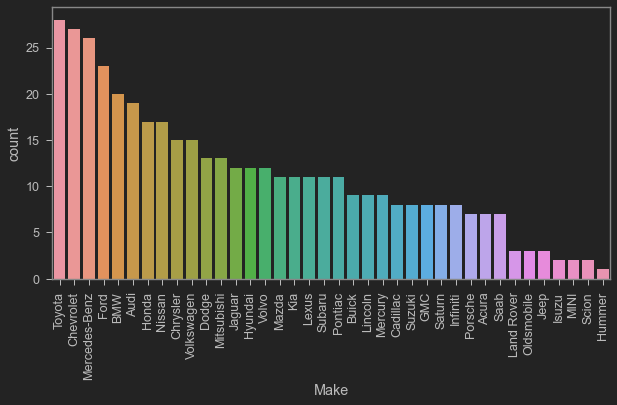

In [52]:
plt.figure(figsize= (10,5))
sns.countplot(x= 'Make',data = data,order=data['Make'].value_counts().index)
plt.xticks(rotation=90)

<AxesSubplot:>

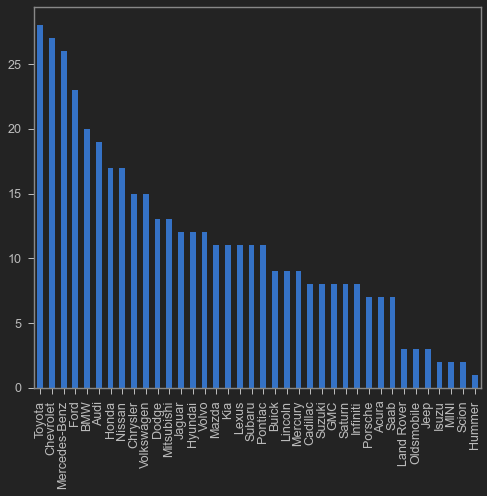

In [53]:
data['Make'].value_counts().plot(kind="bar")


In [54]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [55]:
data.describe(include ='O').T

count unique      top freq
Make         428     38   Toyota   28
Model        428    425  G35 4dr    2
Type         428      6    Sedan  262
Origin       428      3     Asia  158
DriveTrain   428      3    Front  226

In [56]:
data.describe(include ='O').columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype='object')

In [57]:
for i in data.describe(include ='O').columns:
    
    print('----------------------------')
    print('----------',i,'-----------',data[i].nunique())
    #print('---')

    print(data[i].value_counts().to_frame())

----------------------------
---------- Make ----------- 38
               Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
...             ...
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1

[38 rows x 1 columns]
----------------------------
---------- Model ----------- 425
                                Model
G35 4dr                             2
C320 4dr                            2
C240 4dr                            2
Tundra Access Cab V6 SR5            1
Element LX                          1
...                               ...
A4 3.0 Quattro convertible 2dr      1
Tiburon GT V6 2dr                   1
IS 300 SportCross                   1
RX 330                              1
RSX Type S 2dr                      1

[425 rows x 1 columns]
----------------------------
---------- Type ----------- 6
        Type
Sedan    262
SUV       60
Sports    49
Wagon     30
Truck     2

In [58]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [59]:
data[['Make','Type','Origin','MSRP','Invoice','Horsepower','MPG_City','MPG_Highway']].groupby(['Type']).mean()

MSRP       Invoice  Horsepower   MPG_City  MPG_Highway
Type                                                                  
Hybrid  19920.000000  18429.333333   92.000000  55.000000    56.000000
SUV     34790.250000  31625.350000  235.816667  16.100000    20.500000
Sedan   29773.618321  27389.797710  201.656489  21.083969    28.629771
Sports  53387.061224  48473.163265  284.163265  18.408163    25.489796
Truck   24941.375000  22616.750000  224.833333  16.500000    21.000000
Wagon   28840.533333  26645.633333  194.000000  21.100000    27.900000

In [60]:
pd.set_option('display.float_format', '{:.2f}'.format)
data[['Make','Type','Origin','MSRP','Invoice','Horsepower','MPG_City','MPG_Highway']].groupby(['Make']).mean()

MSRP  Invoice  Horsepower  MPG_City  MPG_Highway
Make                                                           
Acura      42938.57 38590.86      239.29     19.43        26.14
Audi       43307.89 39330.11      250.79     18.47        25.79
BMW        43285.25 39620.65      241.45     18.70        27.00
Buick      30537.78 27854.89      214.44     18.89        27.78
Cadillac   50474.38 46426.88      298.12     16.50        23.00
...             ...      ...         ...       ...          ...
Subaru     25501.82 23297.55      191.45     20.27        27.09
Suzuki     16230.25 15891.25      151.00     22.12        27.88
Toyota     22524.46 20295.93      180.68     24.43        30.68
Volkswagen 32248.67 29682.67      201.33     21.40        28.53
Volvo      36314.17 34216.17      223.33     19.75        26.67

[38 rows x 5 columns]

# Data Visualisation 

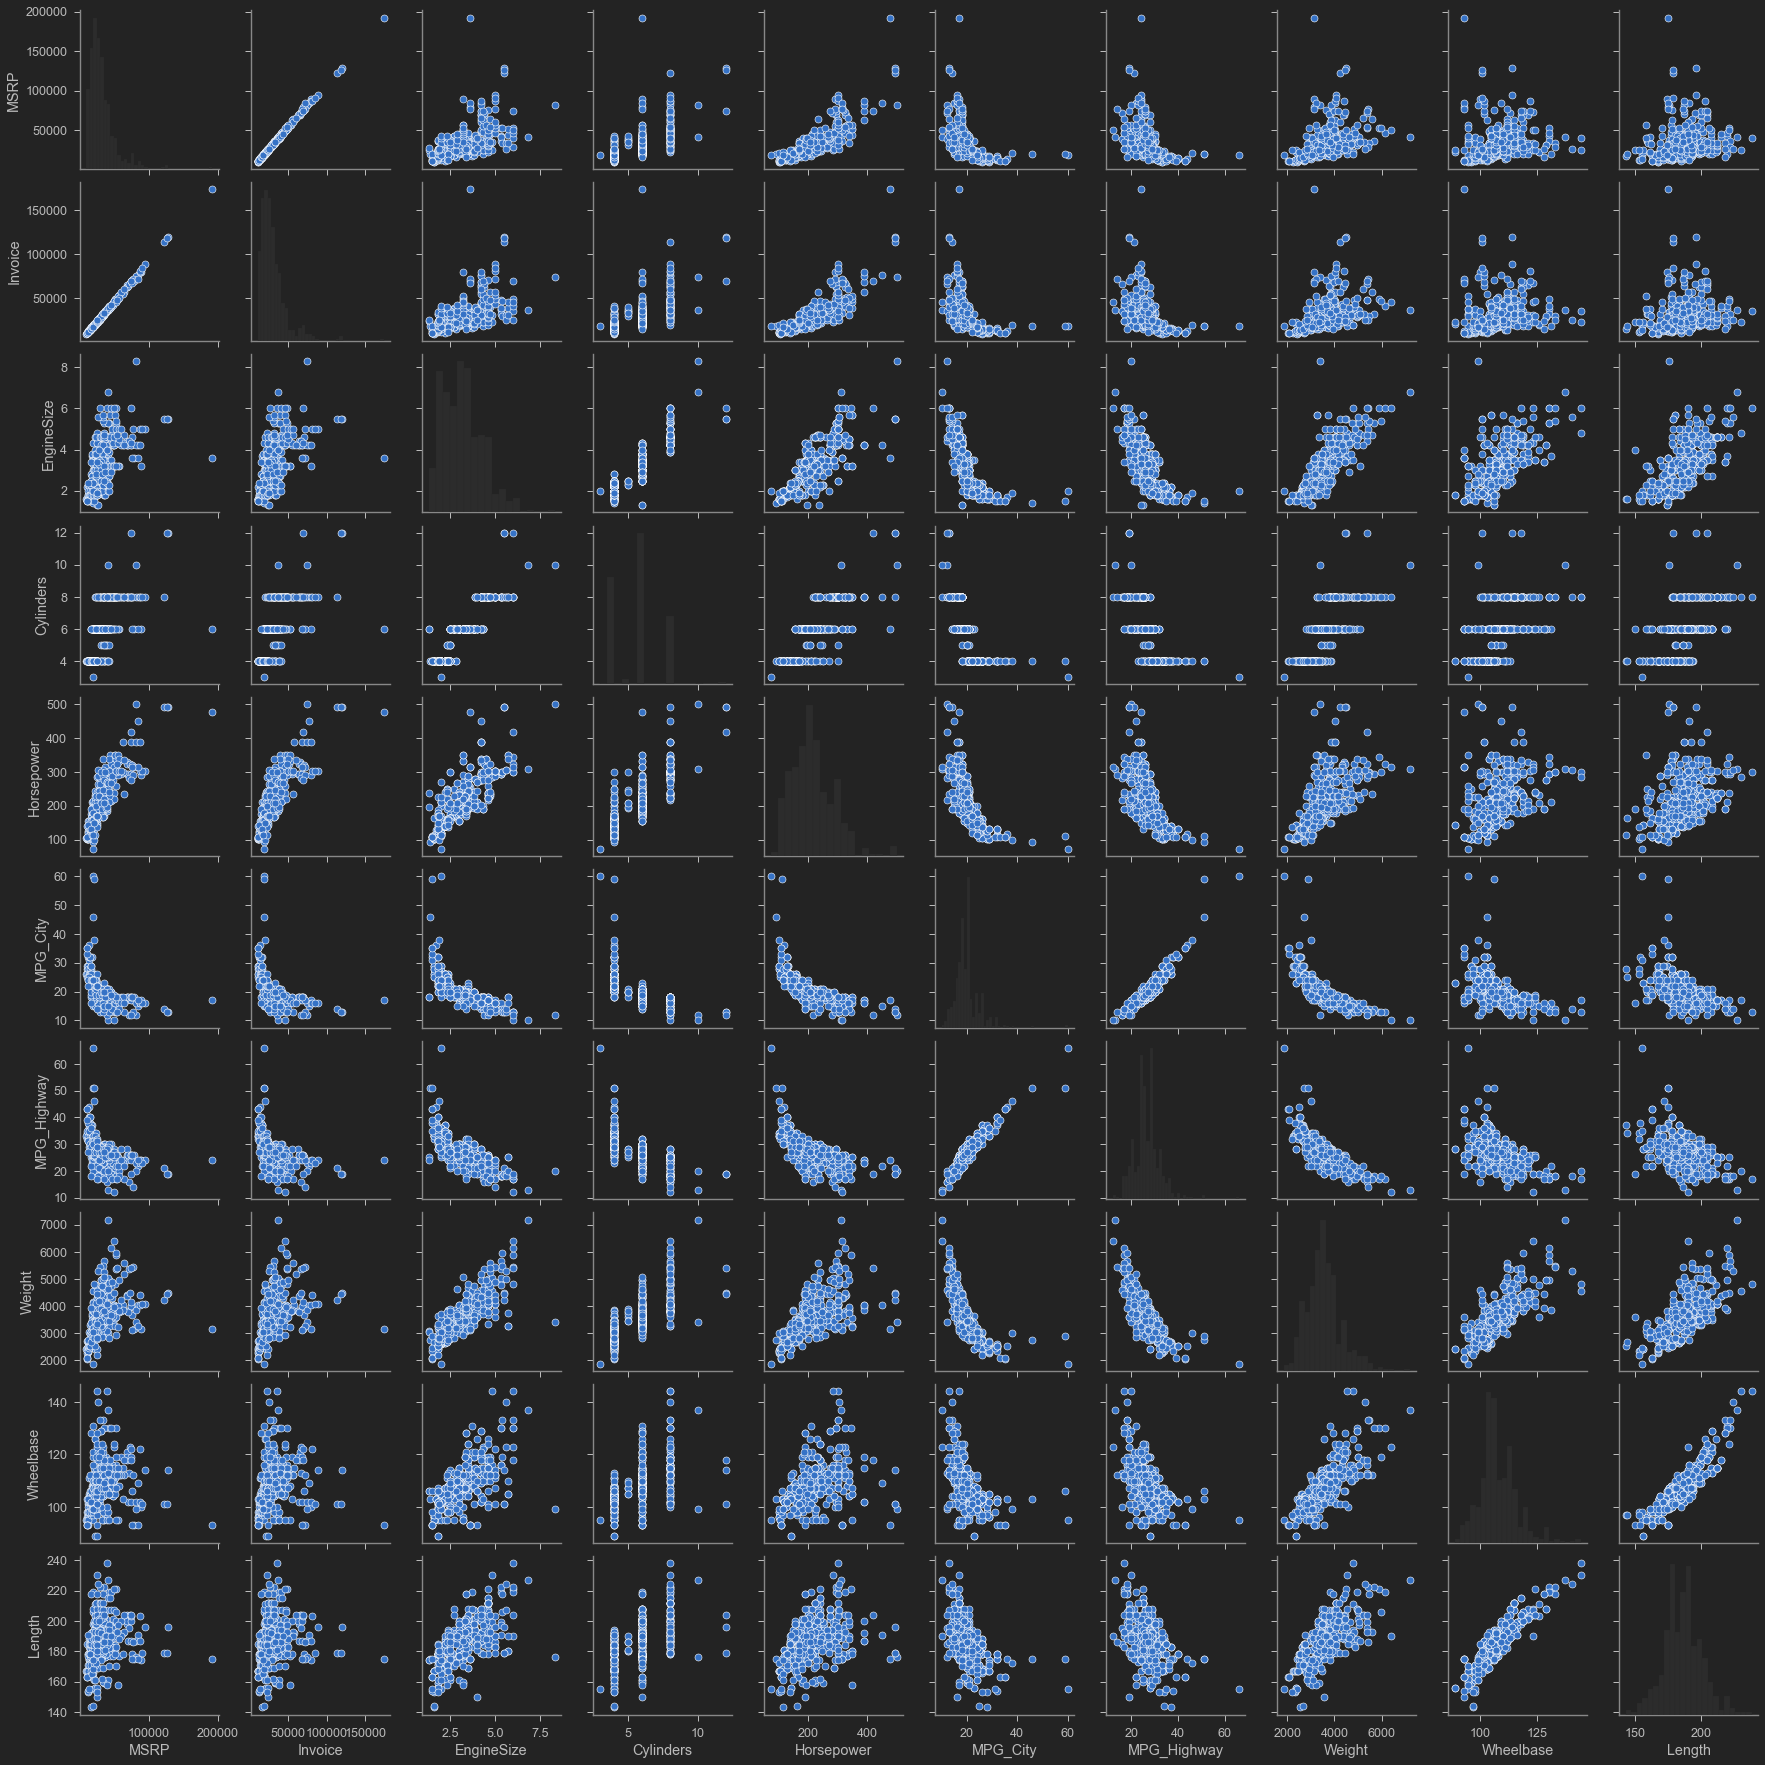

In [61]:
# Looking at the scatter plor and the histogram for all numeric columns to 
# find data pattern & data data distributions
sns.pairplot(data = data)

In [62]:
fig = px.histogram(data, x = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make of the Car', 
                  color_discrete_sequence=['Blue'])
fig.show()

In [63]:
fig = px.histogram(data, x = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make of the Car', 
                   histfunc='count',
                   #color = 'Make'
                  color_discrete_sequence=['Blue']).update_xaxes(categoryorder="total descending")
fig.show()

In [64]:
fig = px.histogram(data, y = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make of the Car',
                  orientation='h')
fig.show()

In [65]:
fig = px.histogram(data, x = 'Type', labels = {'Type':'Car Type'}, 
                  title = 'Type of the Car', 
                   histfunc='count',
                   #color = 'Make'
                  color_discrete_sequence=['Blue']).update_xaxes(categoryorder="total descending")
fig.show()

In [66]:
fig = px.histogram(data, x = 'Origin', labels = {'Oriign':'Origin'}, 
                  title = 'Origin of the Car', 
                   histfunc='count',
                   #color = 'Make'
                  color_discrete_sequence=['Blue']).update_xaxes(categoryorder="total descending")
fig.show()

In [67]:
fig = px.histogram(data, x = 'DriveTrain', labels = {'Drive Train':'Drive '}, 
                  title = 'Drive of the Car', 
                   histfunc='count',
                   #color = 'Make'
                  color_discrete_sequence=['Blue']).update_xaxes(categoryorder="total descending")
fig.show()

In [68]:
fig = px.histogram(data, x = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make of the Car', 
                   histfunc='count',
                   color = 'Origin').update_xaxes(categoryorder="total descending")
fig.show()

In [69]:
fig = px.histogram(data, x = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make of the Car', 
                   histfunc='count',
                   color = 'Origin')
fig.show()

In [70]:
fig = px.histogram(data, x = 'Make', labels = {'Make':'Manufacturer'}, 
                  title = 'Make & Type of the Car', 
                   
                   color = 'Type')
fig.show()

In [71]:
# Visualisaiton for a text data
from wordcloud import WordCloud, STOPWORDS

In [72]:
text = data.Model.values

In [73]:
text


array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [74]:
stopwords = set(STOPWORDS)

In [75]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [76]:
len(stopwords)

192

In [77]:
wc = WordCloud(background_color='black', max_words=2000, max_font_size=100, random_state=101,
              stopwords=stopwords, contour_width= 3).generate(str(text))

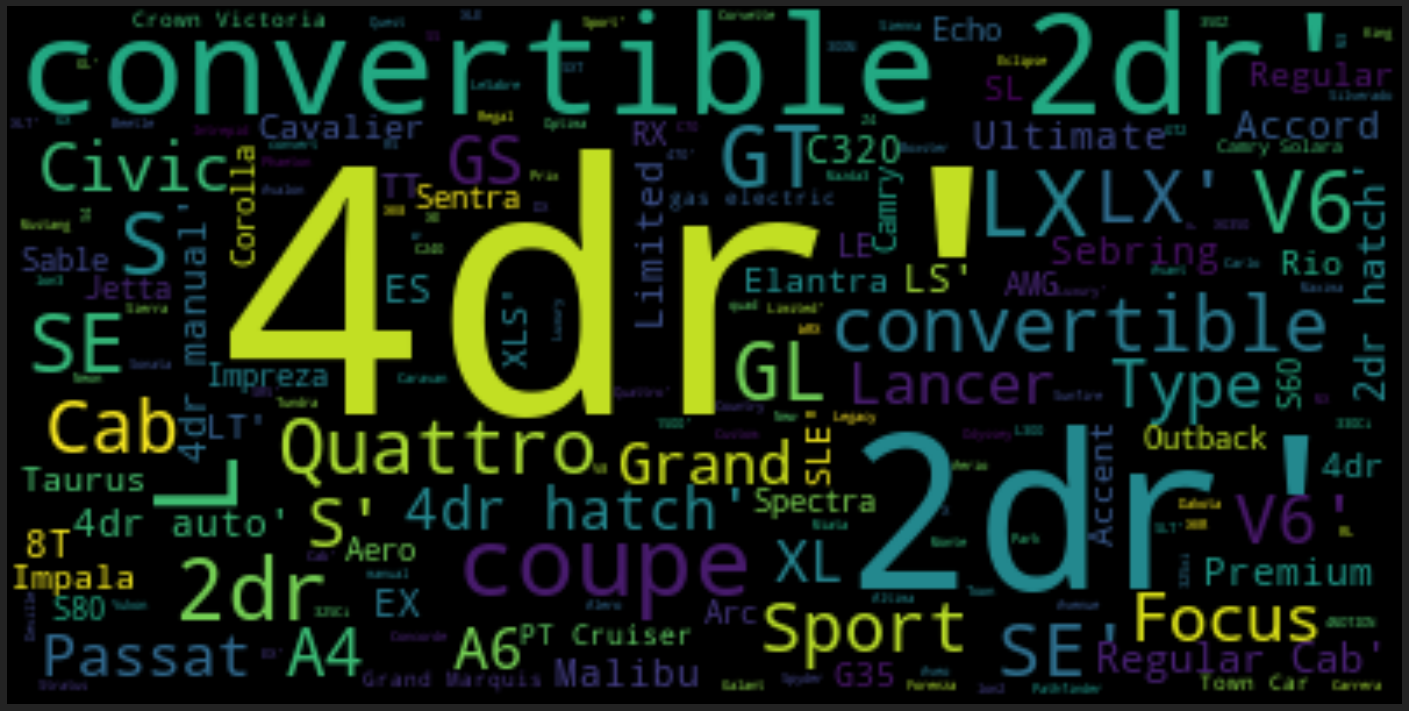

In [78]:
fig = plt.figure(figsize = (25,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
# COrrelation Marix
data.corr()

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.00     1.00        0.57       0.65        0.83     -0.48   
Invoice      1.00     1.00        0.56       0.64        0.82     -0.47   
EngineSize   0.57     0.56        1.00       0.90        0.79     -0.71   
Cylinders    0.65     0.64        0.90       1.00        0.81     -0.68   
Horsepower   0.83     0.82        0.79       0.81        1.00     -0.68   
MPG_City    -0.48    -0.47       -0.71      -0.68       -0.68      1.00   
MPG_Highway -0.44    -0.43       -0.72      -0.68       -0.65      0.94   
Weight       0.45     0.44        0.81       0.74        0.63     -0.74   
Wheelbase    0.15     0.15        0.64       0.55        0.39     -0.51   
Length       0.17     0.17        0.64       0.55        0.38     -0.50   

             MPG_Highway  Weight  Wheelbase  Length  
MSRP               -0.44    0.45       0.15    0.17  
Invoice            -0.43    0.44       0.15    0.17  
EngineSize         -0.72    0.81       0.64    0.64  
Cylinders          -0.68    0.74       0.55    0.55  
Horsepower         -0.65    0.63       0.39    0.38  
MPG_City            0.94   -0.74      -0.51   -0.50  
MPG_Highway         1.00   -0.79      -0.52   -0.47  
Weight             -0.79    1.00       0.76    0.69  
Wheelbase          -0.52    0.76       1.00    0.89  
Length             -0.47    0.69       0.89    1.00

<AxesSubplot:>

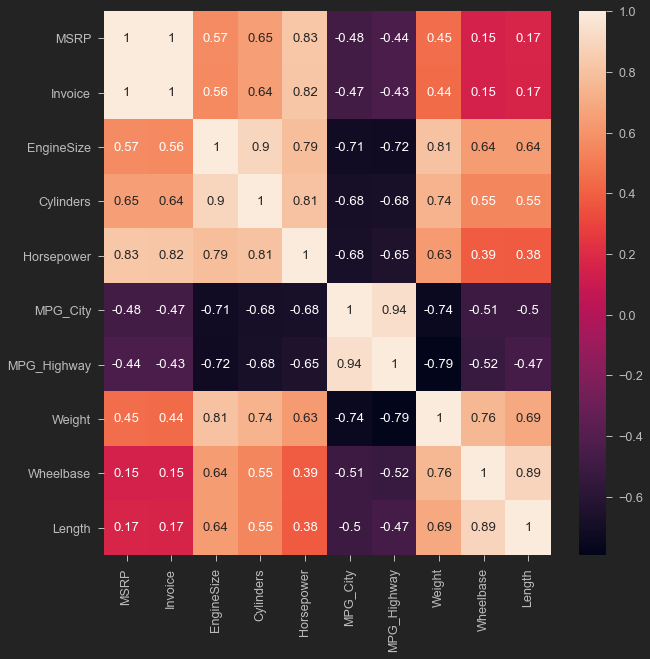

In [80]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot=True)

In [81]:
# Encoding Categorical Data
# One Hot Encoding - Creating Binary Vectors for each of the categories
# There should not be any order in teh categories so we can have 1,2,3
# instead we want to have 0 & 1 to represent diff categories

How to use the ColumnTransformer
The ColumnTransformer is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms.

For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

To use the ColumnTransformer, you must specify a list of transformers.

Each transformer is a three-element tuple that defines the name of the transformer, the transform to apply, and the column indices to apply it to. For example:

(Name, Object, Columns)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 70.2+ KB


In [83]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337        3.50   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761        2.00   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647        2.40   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299        3.20   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014        3.50   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0       6.00         265        17           23    4451        106     189  
1       4.00         200        24           31    2778        101     172  
2       4.00         200        22           29    3230        105     183  
3       6.00         270        20           28    3575        108     186  
4       6.00         225        18           24    3880        115     197

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('cat', OneHotEncoder(),[0])], remainder ='passthrough' )
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,1,2,3,4])],remainder='passthrough' )

In [85]:
data

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0          3.50       6.00         265        17           23    4451   
1          2.00       4.00         200        24           31    2778   
2          2.40       4.00         200        22           29    3230   
3          3.20       6.00         270        20           28    3575   
4          3.50       6.00         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423        2.40       5.00         197        21           28    3450   
424        2.30       5.00         242        20           26    3450   
425        2.90       6.00         268        19           26    3653   
426        1.90       4.00         170        22           29    2822   
427        2.50       5.00         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 15 columns]

In [87]:
#data.info()
#data_enc

In [88]:
data_enc = ct.fit_transform(data)

In [89]:
data_enc

<428x485 sparse matrix of type '<class 'numpy.float64'>'
	with 6420 stored elements in Compressed Sparse Row format>

In [90]:
data_car = data.copy()

In [91]:
data_car

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0          3.50       6.00         265        17           23    4451   
1          2.00       4.00         200        24           31    2778   
2          2.40       4.00         200        22           29    3230   
3          3.20       6.00         270        20           28    3575   
4          3.50       6.00         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423        2.40       5.00         197        21           28    3450   
424        2.30       5.00         242        20           26    3450   
425        2.90       6.00         268        19           26    3653   
426        1.90       4.00         170        22           29    2822   
427        2.50       5.00         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 15 columns]

In [92]:
data_dum = pd.get_dummies(data_car, columns=['Make','Model','Type','Origin','DriveTrain'])

In [93]:
data_dum.head()

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0  36945    33337        3.50       6.00         265        17           23   
1  23820    21761        2.00       4.00         200        24           31   
2  26990    24647        2.40       4.00         200        22           29   
3  33195    30299        3.20       6.00         270        20           28   
4  43755    39014        3.50       6.00         225        18           24   

   Weight  Wheelbase  Length  Make_Acura  Make_Audi  Make_BMW  Make_Buick  \
0    4451        106     189           1          0         0           0   
1    2778        101     172           1          0         0           0   
2    3230        105     183           1          0         0           0   
3    3575        108     186           1          0         0           0   
4    3880        115     197           1          0         0           0   

   Make_Cadillac  ...  Model_lon3 quad coupe 2dr  Model_xA 4dr hatch  \
0              0  ...                          0                   0   
1              0  ...                          0                   0   
2              0  ...                          0                   0   
3              0  ...                          0                   0   
4              0  ...                          0                   0   

   Model_xB  Type_Hybrid  Type_SUV  Type_Sedan  Type_Sports  Type_Truck  \
0         0            0         1           0            0           0   
1         0            0         0           1            0           0   
2         0            0         0           1            0           0   
3         0            0         0           1            0           0   
4         0            0         0           1            0           0   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0           0            1              0           0               1   
1           0            1              0           0               0   
2           0            1              0           0               0   
3           0            1              0           0               0   
4           0            1              0           0               0   

   DriveTrain_Front  DriveTrain_Rear  
0                 0                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 485 columns]

In [94]:
car_df = data_dum.drop(['Invoice'],axis = 1)

In [95]:
car_df

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0    36945        3.50       6.00         265        17           23    4451   
1    23820        2.00       4.00         200        24           31    2778   
2    26990        2.40       4.00         200        22           29    3230   
3    33195        3.20       6.00         270        20           28    3575   
4    43755        3.50       6.00         225        18           24    3880   
..     ...         ...        ...         ...       ...          ...     ...   
423  40565        2.40       5.00         197        21           28    3450   
424  42565        2.30       5.00         242        20           26    3450   
425  45210        2.90       6.00         268        19           26    3653   
426  26135        1.90       4.00         170        22           29    2822   
427  35145        2.50       5.00         208        20           27    3823   

     Wheelbase  Length  Make_Acura  Make_Audi  Make_BMW  Make_Buick  \
0          106     189           1          0         0           0   
1          101     172           1          0         0           0   
2          105     183           1          0         0           0   
3          108     186           1          0         0           0   
4          115     197           1          0         0           0   
..         ...     ...         ...        ...       ...         ...   
423        105     186           0          0         0           0   
424        105     186           0          0         0           0   
425        110     190           0          0         0           0   
426        101     180           0          0         0           0   
427        109     186           0          0         0           0   

     Make_Cadillac  Make_Chevrolet  ...  Model_lon3 quad coupe 2dr  \
0                0               0  ...                          0   
1                0               0  ...                          0   
2                0               0  ...                          0   
3                0               0  ...                          0   
4                0               0  ...                          0   
..             ...             ...  ...                        ...   
423              0               0  ...                          0   
424              0               0  ...                          0   
425              0               0  ...                          0   
426              0               0  ...                          0   
427              0               0  ...                          0   

     Model_xA 4dr hatch  Model_xB  Type_Hybrid  Type_SUV  Type_Sedan  \
0                     0         0            0         1           0   
1                     0         0            0         0           1   
2                     0         0            0         0           1   
3                     0         0            0         0           1   
4                     0         0            0         0           1   
..                  ...       ...          ...       ...         ...   
423                   0         0            0         0           1   
424                   0         0            0         0           1   
425                   0         0            0         0           1   
426                   0         0            0         0           0   
427                   0         0            0         0           0   

     Type_Sports  Type_Truck  Type_Wagon  Origin_Asia  Origin_Europe  \
0              0           0           0            1              0   
1              0           0           0            1              0   
2              0           0           0            1              0   
3              0           0           0            1              0   
4              0           0           0            1              0   
..           ...         ...         ...          ... 

In [96]:
X = car_df.drop(['MSRP'],axis = 1)
y = car_df['MSRP']

In [97]:
X = np.array(X)
y = np.array(y)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((342, 483), (86, 483), (342,), (86,))

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [102]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [103]:
acc = lm.score(X_test,y_test)
acc

0.8637292360933679

In [104]:
y_pred = lm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Regression Model'),
 Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price')]

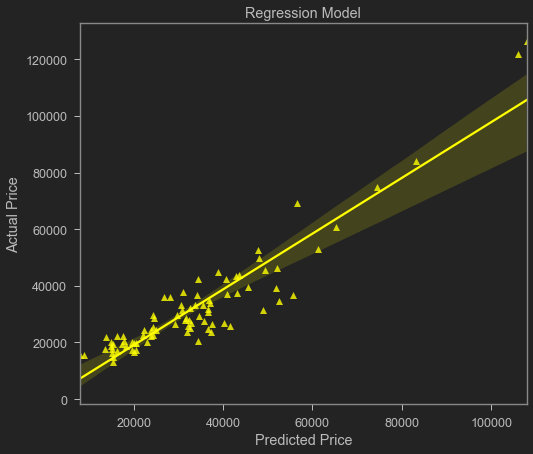

In [105]:
fig = sns.regplot(y_pred, y_test, color = 'yellow',marker = '^')
fig.set(title = 'Regression Model',xlabel = 'Predicted Price',ylabel= 'Actual Price')

In [106]:

MSE = mean_squared_error(y_test, y_pred)
MSE

50625981.860230155

In [107]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

5282.559556186966

In [108]:
# R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent 
# variable that's explained by an independent variable or variables in a regression model.
#  Whereas correlation explains the strength of the relationship between an independent and dependent variable, 
# R-squared explains to what extent the variance of one variable explains the variance of the second variable. 
# So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.
r2 = r2_score(y_test,y_pred)
r2

0.8637292360933679

In [109]:
RMSE = float(format(np.sqrt(MSE),'0.3f'))
RMSE

7115.194

In [110]:
print('MSE = ' ,MSE, '\nMAE = ',MAE, '\nr2 = ',r2, '\nRMSE = ',RMSE)

MSE =  50625981.860230155 
MAE =  5282.559556186966 
r2 =  0.8637292360933679 
RMSE =  7115.194


# One Hot Encoding

In [111]:
df = data.copy()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 70.2+ KB


In [113]:
df.head(2)

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337        3.50   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761        2.00   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0       6.00         265        17           23    4451        106     189  
1       4.00         200        24           31    2778        101     172

In [114]:
df_arr = np.array(df)

In [115]:
type(df_arr)

numpy.ndarray

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('cat', OneHotEncoder(),[0])], remainder ='passthrough' )
newct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False),[0,2,3,4])],remainder='passthrough' )

In [120]:
df_new_arr

array([[1.0, 0.0, 0.0, ..., 4451, 106, 189],
       [1.0, 0.0, 0.0, ..., 2778, 101, 172],
       [1.0, 0.0, 0.0, ..., 3230, 105, 183],
       ...,
       [0.0, 0.0, 0.0, ..., 3653, 110, 190],
       [0.0, 0.0, 0.0, ..., 2822, 101, 180],
       [0.0, 0.0, 0.0, ..., 3823, 109, 186]], dtype=object)

In [121]:
df_new_arr = np.array(newct.fit_transform(df_arr))

In [122]:
pd.DataFrame(df_new_arr)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0   1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1   1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2   1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3   1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4   1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
423 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
424 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
425 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
426 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
427 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

      14  ...   46   47   48   49                       50     51     52   53  \
0   0.00  ... 0.00 1.00 0.00 0.00                      MDX  36945  33337 3.50   
1   0.00  ... 0.00 0.00 1.00 0.00           RSX Type S 2dr  23820  21761 2.00   
2   0.00  ... 0.00 0.00 1.00 0.00                  TSX 4dr  26990  24647 2.40   
3   0.00  ... 0.00 0.00 1.00 0.00                   TL 4dr  33195  30299 3.20   
4   0.00  ... 0.00 0.00 1.00 0.00               3.5 RL 4dr  43755  39014 3.50   
..   ...  ...  ...  ...  ...  ...                      ...    ...    ...  ...   
423 0.00  ... 0.00 0.00 1.00 0.00  C70 LPT convertible 2dr  40565  38203 2.40   
424 0.00  ... 0.00 0.00 1.00 0.00  C70 HPT convertible 2dr  42565  40083 2.30   
425 0.00  ... 0.00 0.00 1.00 0.00               S80 T6 4dr  45210  42573 2.90   
426 0.00  ... 0.00 0.00 1.00 0.00                      V40  26135  24641 1.90   
427 0.00  ... 0.00 1.00 0.00 0.00                     XC70  35145  33112 2.50   

      54   55  56  57    58   59   60  
0   6.00  265  17  23  4451  106  189  
1   4.00  200  24  31  2778  101  172  
2   4.00  200  22  29  3230  105  183  
3   6.00  270  20  28  3575  108  186  
4   6.00  225  18  24  3880  115  197  
..   ...  ...  ..  ..   ...  ...  ...  
423 5.00  197  21  28  3450  105  186  
424 5.00  242  20  26  3450  105  186  
425 6.00  268  19  26  3653  110  190  
426 4.00  170  22  29  2822  101  180  
427 5.00  208  20  27  3823  109  186  

[428 rows x 61 columns]

In [118]:
df_new_arr.shape

(428, 61)

In [119]:
df.describe(include = ['O']).T

count unique      top freq
Make         428     38   Toyota   28
Model        428    425  G35 4dr    2
Type         428      6    Sedan  262
Origin       428      3     Asia  158
DriveTrain   428      3    Front  226